In [54]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

In [3]:
#Load the data
df = pd.read_csv('breast_label.csv')
df.head(7)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0


In [4]:
df.shape

(569, 10)

In [5]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
class                          0
dtype: int64

In [6]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) diagnosis (not harmful). Value of 2 indicates benign, value of 4 indicates malignant.
df['class'].value_counts()

2.0    361
4.0    208
Name: class, dtype: int64

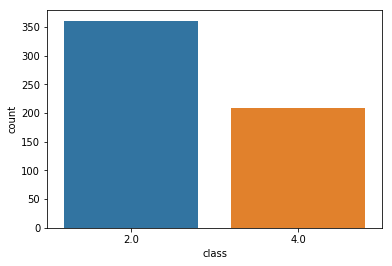

In [7]:
#Visualize this count
sns.countplot(df['class'],label="Count")

In [9]:
df.dtypes

clump_thickness                float64
uniformity_of_cell_size        float64
uniformity_of_cell_shape       float64
marginal_adhesion              float64
single_epithelial_cell_size    float64
bare_nuclei                    float64
bland_chromatin                float64
normal_nucleoli                float64
mitosis                        float64
class                          float64
dtype: object

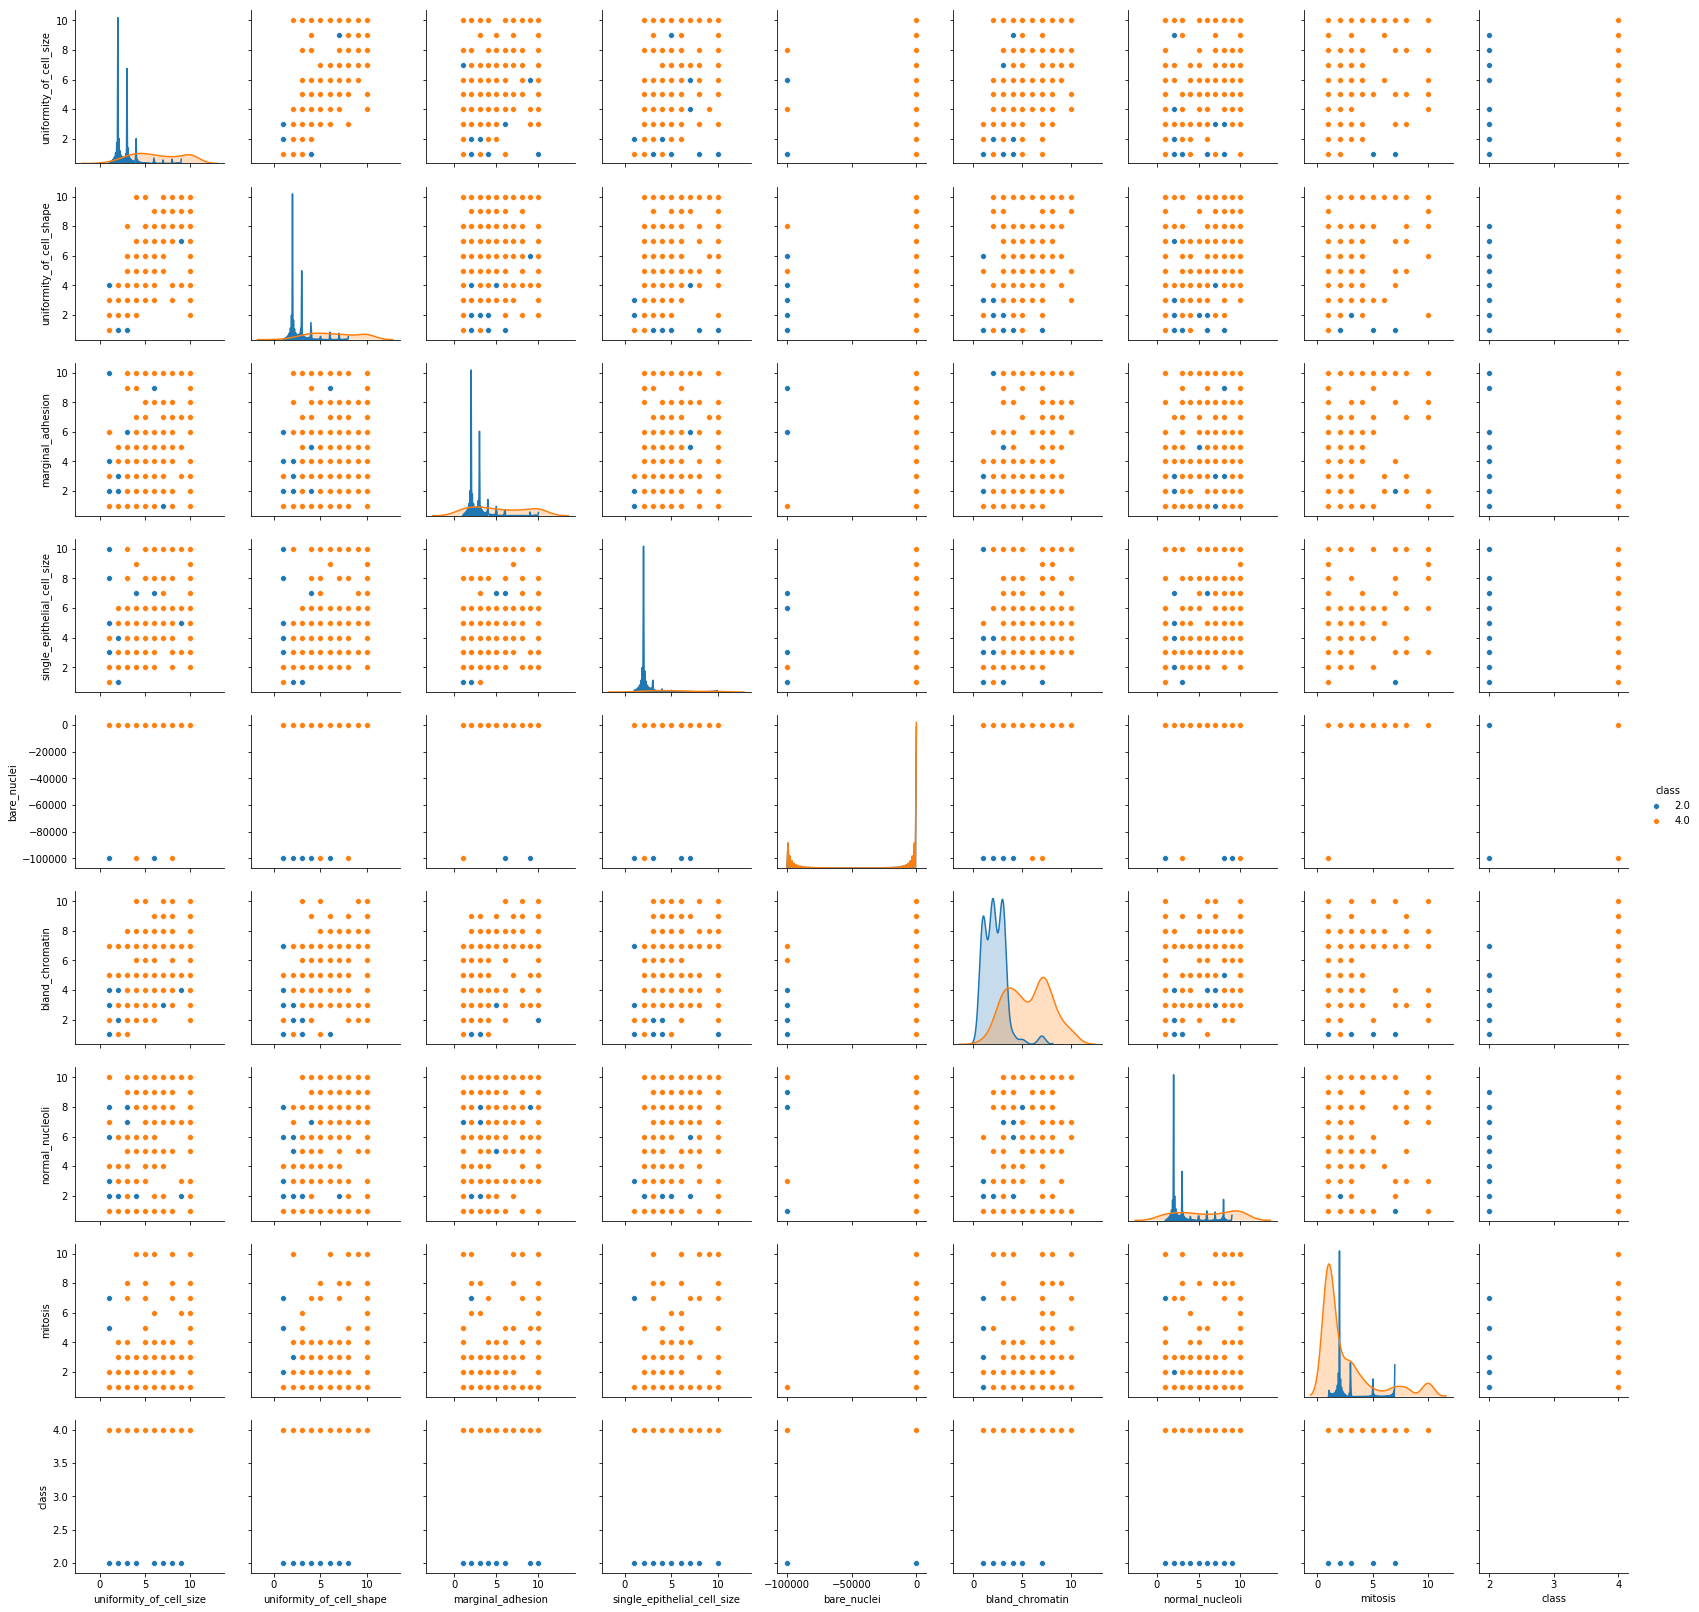

In [43]:
#A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value

sns.pairplot(df.iloc[:,1:12], hue="class") #plot a sample of the columns

In [12]:
#Get the correlation of the columns
df.corr()
df.iloc[:,1:12].corr() #Get a sample of correlated column info

,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
uniformity_of_cell_size,1.000000,0.906454,0.679598,0.746929,0.035882,0.716213,0.720115,0.478014,0.797631
uniformity_of_cell_shape,0.906454,1.000000,0.656068,0.716573,0.014951,0.706026,0.714148,0.447445,0.807882
marginal_adhesion,0.679598,0.656068,1.000000,0.581964,0.056242,0.631695,0.604092,0.416908,0.670064
single_epithelial_cell_size,0.746929,0.716573,0.581964,1.000000,0.054829,0.592933,0.620427,0.483810,0.666963
bare_nuclei,0.035882,0.014951,0.056242,0.054829,1.000000,0.016002,0.006677,0.059306,0.079533
bland_chromatin,0.716213,0.706026,0.631695,0.592933,0.016002,1.000000,0.653791,0.335530,0.724267
normal_nucleoli,0.720115,0.714148,0.604092,0.620427,0.006677,0.653791,1.000000,0.418912,0.703253
mitosis,0.478014,0.447445,0.416908,0.483810,0.059306,0.335530,0.418912,1.000000,0.433017
class,0.797631,0.807882,0.670064,0.666963,0.079533,0.724267,0.703253,0.433017,1.000000


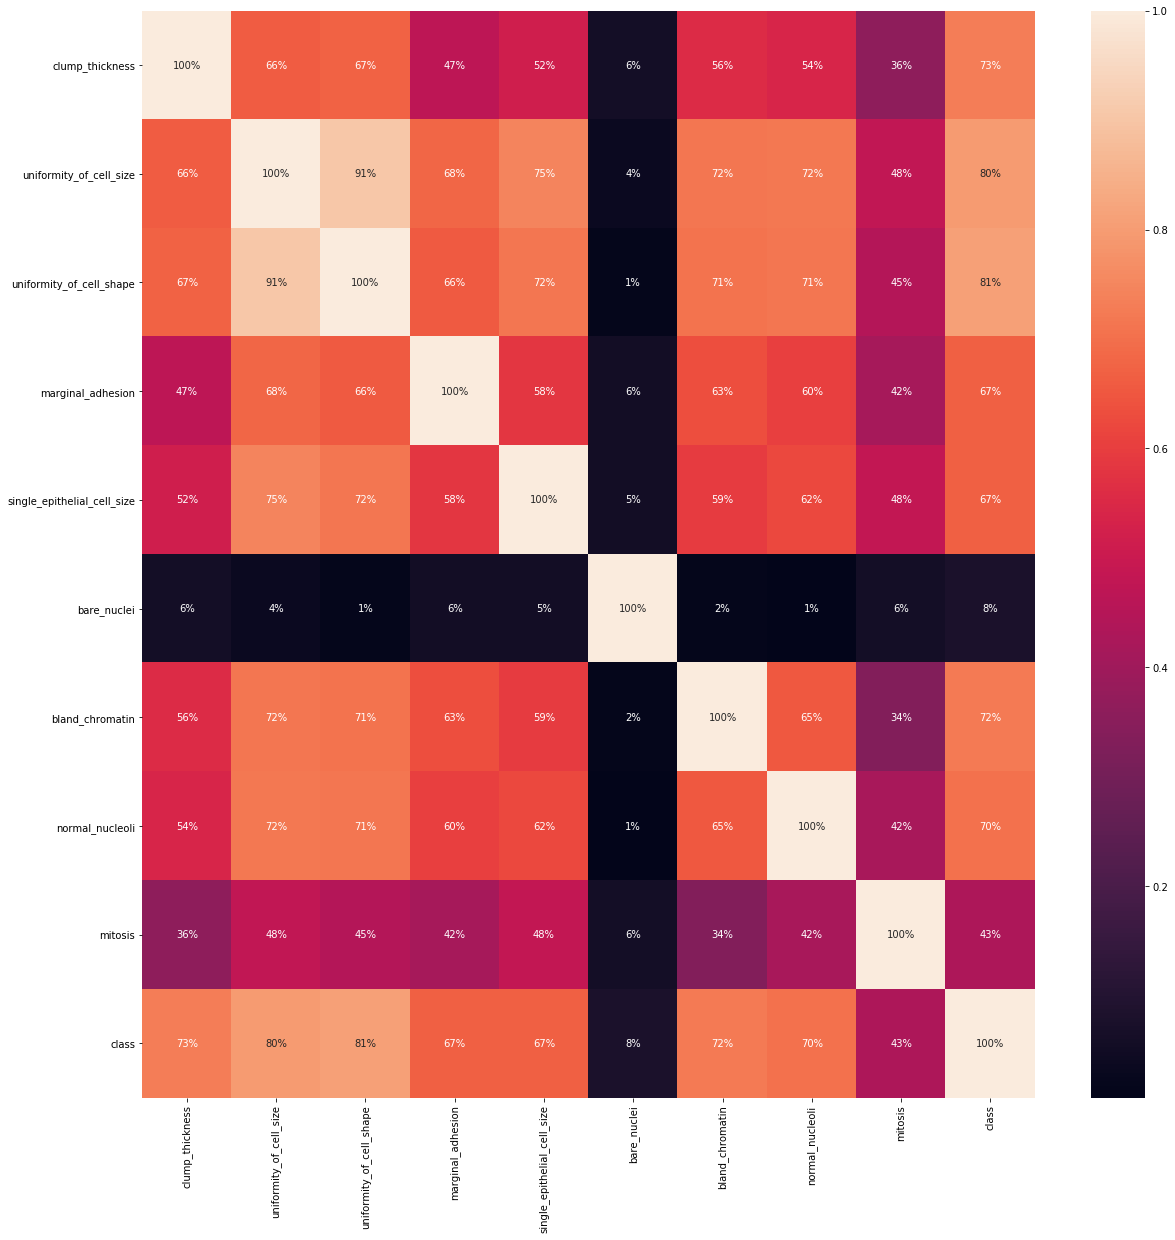

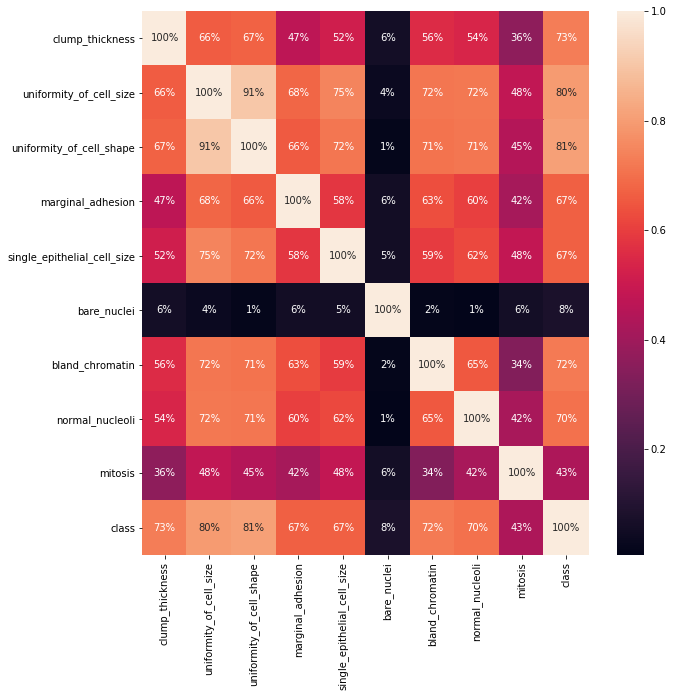

In [16]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,20))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.figure(figsize=(10,10)) #This is used to change the size of the figure/ heatmap
sns.heatmap(df.iloc[:,0:10].corr(), annot=True, fmt='.0%') #Get a heap map of 10 columns, index 0-10, note index 0 is just the id column and is left out.

In [22]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:8].values #Notice I started from index  0 to 8, removing the class
Y = df.iloc[:, 9].values #Get the target variable 'class' located at index=9


In [23]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 1.91352543,  0.32584443,  0.27090784, ...,  0.17777948,
        -0.61122793,  0.02804872],
       [ 0.16874411, -0.37169189, -0.41603705, ...,  0.17725626,
        -0.61122793, -0.30386109],
       [ 0.16874411,  1.37214891,  2.33174252, ...,  0.17777948,
         2.93139927,  2.35141737],
       ...,
       [ 1.91352543, -0.02292373,  0.61438029, ...,  0.17760508,
        -0.16839953,  0.69186833],
       [ 0.16874411, -0.72046005, -0.75950949, ...,  0.17725626,
        -0.61122793, -0.6357709 ],
       [ 0.16874411, -0.72046005, -0.75950949, ...,  0.17725626,
        -0.61122793, -0.6357709 ]])

In [80]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
     #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    
    
        #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[4]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[5]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, gauss, tree, forest

In [81]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9624413145539906
[1]K Nearest Neighbor Training Accuracy: 0.9553990610328639
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9624413145539906
[3]Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[4]Decision Tree Classifier Training Accuracy: 1.0
[5]Random Forest Classifier Training Accuracy: 1.0


C:\Users\Munir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
     
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[83  5]
 [ 3 52]]
Model[0] Testing Accuracy = "0.9440559440559441!"

[[84  4]
 [ 4 51]]
Model[1] Testing Accuracy = "0.9440559440559441!"

[[83  5]
 [ 2 53]]
Model[2] Testing Accuracy = "0.951048951048951!"

[[84  4]
 [ 2 53]]
Model[3] Testing Accuracy = "0.958041958041958!"

[[84  4]
 [ 5 50]]
Model[4] Testing Accuracy = "0.9370629370629371!"

[[84  4]
 [ 4 51]]
Model[5] Testing Accuracy = "0.9440559440559441!"



In [28]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

         2.0       0.97      0.94      0.95        88
         4.0       0.91      0.95      0.93        55

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  1
              precision    recall  f1-score   support

         2.0       0.95      0.95      0.95        88
         4.0       0.93      0.93      0.93        55

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  2
              precision    recall  f1-score   support

         2.0       0.98      0.94      0.96        88
         4.0       0.91      0.96      0.94        55

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighte

In [29]:
#Print Prediction of Random Forest Classifier model
pred = model[5].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

[2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 4. 2. 2. 2. 4. 4. 4.
 2. 2. 4. 4. 2. 2. 4. 4. 4. 4. 2. 2. 4. 2. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2.
 4. 4. 2. 2. 2. 2. 2. 4. 4. 2. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 4. 2. 4. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 4. 4. 2. 2. 4. 4.
 2. 4. 2. 4. 2. 4. 2. 2. 2. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 2. 2. 2. 2.
 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2.]

[2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 4. 2. 2. 2. 4. 4. 4.
 2. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 4. 4. 4. 2. 4. 4. 2. 4. 2.
 4. 4. 4. 2. 2. 2. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 2. 4. 4. 2. 4. 2.
 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 4. 2. 4. 4. 4. 2. 4. 4. 2. 2. 4. 4.
 2. 4. 2. 4. 4. 4. 2. 2. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 2. 2. 2. 2.
 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2.]


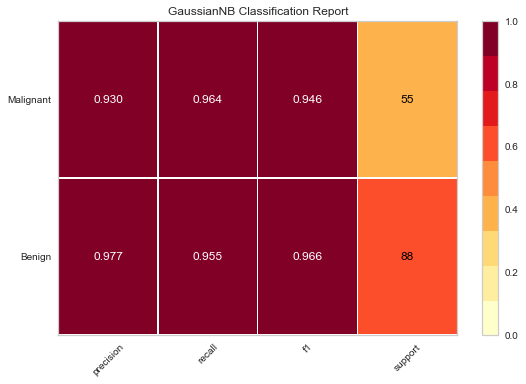

In [82]:
 #Use Yellowbrick to visualize confusion matrix results of Gaussian Classifier 

# Specify the target classes
classes = ["Benign", "Malignant"]
gauss = GaussianNB()
gauss.fit(X_train, Y_train)
visualizer = ClassificationReport(gauss, classes=classes, support=True)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
visualizer.poof()